## Dupla-Sena

Neste projeto iremos analisar os resultados de jogos da Dupla-Sena.

Com apenas um bilhete da Dupla Sena, você tem o dobro de chances de ganhar: são dois sorteios por concurso e ganha acertando 3, 4, 5 ou 6 números no primeiro e/ou segundo sorteios.
Basta escolher de 6 a 15 números dentre os 50 disponíveis e torcer.

### Premiação

O prêmio bruto corresponde a 43,35% da arrecadação. Desse valor, são distribuídos, __para o primeiro sorteio__:

- 30% entre os acertadores de 6 números,
- 10% entre os acertadores de 5 números,
- 8% entre os acertadores de 4 números,
- 4% entre os acertadores de 3 números;

__E para o segundo sorteio:__

- 11% são atribuídos entre os acertadores de 6 números,
- 9% entre os acertadores de 5 números,
- 8% entre os acertadores de 4 números e
- 4% entre os acertadores de 3 números;
- 16% ficam acumulados para a 1ª faixa do 1º sorteio (seis acertos) do próximo concurso especial de Páscoa.

### Downloads
- Informações sobre a [Dupla Sena](http://loterias.caixa.gov.br/wps/portal/loterias/landing/duplasena)
- Arquivos de [Dados](http://www1.caixa.gov.br/loterias/_arquivos/loterias/d_dplsen.zip)

![Logo](dupla_sena.png)

In [1]:
# Importando as bibliotecas que iremos utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palpita import palpite

%matplotlib inline

In [2]:
# Carregando o arquivo, neste caso o arquivo veio em formato HTML

dupla_sena = pd.read_html('D_DPLSEN.htm')

In [3]:
# Arquivo carregado como lista, iremos conferir suas 5 primeiras linhas
dupla_sena[0][:5]

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,Concurso,Data Sorteio,1º número_Sorteio1,2º número_Sorteio1,3º número_Sorteio1,4º número_Sorteio1,5º número_Sorteio1,6º número_Sorteio1,Arrecadação_Total,Ganhadores_Sena_Sorteio1,...,Ganhadores_Sena_Sorteio2,Rateio_Sena_Sorteio2,Ganhadores_Quina_Sorteio2,Rateio_Quina_Sorteio2,Ganhadores_Quadra_Sorteio2,Rateio_Quadra_Sorteio2,Ganhadores_Terno_Sorteio2,Rateio_Terno_Sorteio2,Estimativa_Prêmio,Acumulado Especial de Páscoa
1,1,06/11/2001,41,48,15,07,24,50,000,0,...,0,000,55,2.31759,1307,9716,0,000,000,000
2,2,09/11/2001,11,38,32,04,09,42,000,0,...,0,000,35,2.65540,2014,4598,0,000,000,000
3,3,13/11/2001,42,34,11,44,45,47,000,0,...,0,000,21,4.71993,1264,7813,0,000,000,000
4,4,16/11/2001,38,44,50,46,43,29,000,0,...,0,000,8,10.66817,1042,8159,0,000,000,000


In [4]:
# Iremos remover as colunas que não serão utilizadas em nossa analise
colunas = [10,11,19,20,33,34,35,36]
dupla_sena[0].drop(columns=colunas, inplace=True)

In [5]:
# Conferindo a mudança feita
dupla_sena[0][:5]

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Concurso,Data Sorteio,1º número_Sorteio1,2º número_Sorteio1,3º número_Sorteio1,4º número_Sorteio1,5º número_Sorteio1,6º número_Sorteio1,Arrecadação_Total,Ganhadores_Sena_Sorteio1,...,3º número_Sorteio2,4º número_Sorteio2,5º número_Sorteio2,6º número_Sorteio2,Ganhadores_Sena_Sorteio2,Rateio_Sena_Sorteio2,Ganhadores_Quina_Sorteio2,Rateio_Quina_Sorteio2,Ganhadores_Quadra_Sorteio2,Rateio_Quadra_Sorteio2
1,1,06/11/2001,41,48,15,07,24,50,000,0,...,41,49,44,09,0,000,55,2.31759,1307,9716
2,2,09/11/2001,11,38,32,04,09,42,000,0,...,46,29,19,24,0,000,35,2.65540,2014,4598
3,3,13/11/2001,42,34,11,44,45,47,000,0,...,48,30,40,12,0,000,21,4.71993,1264,7813
4,4,16/11/2001,38,44,50,46,43,29,000,0,...,02,07,49,11,0,000,8,10.66817,1042,8159


In [6]:
# Iremos criar um df recebendo as informações da posição 0 da lista

df = pd.DataFrame(dupla_sena[0]).copy()

In [7]:
# Lendo o inicio do DF

df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Concurso,Data Sorteio,1º número_Sorteio1,2º número_Sorteio1,3º número_Sorteio1,4º número_Sorteio1,5º número_Sorteio1,6º número_Sorteio1,Arrecadação_Total,Ganhadores_Sena_Sorteio1,...,3º número_Sorteio2,4º número_Sorteio2,5º número_Sorteio2,6º número_Sorteio2,Ganhadores_Sena_Sorteio2,Rateio_Sena_Sorteio2,Ganhadores_Quina_Sorteio2,Rateio_Quina_Sorteio2,Ganhadores_Quadra_Sorteio2,Rateio_Quadra_Sorteio2
1,1,06/11/2001,41,48,15,07,24,50,000,0,...,41,49,44,09,0,000,55,2.31759,1307,9716
2,2,09/11/2001,11,38,32,04,09,42,000,0,...,46,29,19,24,0,000,35,2.65540,2014,4598
3,3,13/11/2001,42,34,11,44,45,47,000,0,...,48,30,40,12,0,000,21,4.71993,1264,7813
4,4,16/11/2001,38,44,50,46,43,29,000,0,...,02,07,49,11,0,000,8,10.66817,1042,8159


In [8]:
# Como o df não foi criado com os nomes das colunas e elas estão listadas na linha 0
# iremos atualizar o nome das colunas

df.columns = df.loc[0]

In [9]:
# Renomeando as colunas para facilitar as consultas

df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('ª','')
df.columns = df.columns.str.replace('º','')
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('ú','u')
df.columns = df.columns.str.replace('numero_sorteio','')
df.columns

Index(['concurso', 'data_sorteio', '1_1', '2_1', '3_1', '4_1', '5_1', '6_1',
       'arrecadação_total', 'ganhadores_sena_sorteio1', 'rateio_sena_sorteio1',
       'acumulado_sena_sorteio1', 'valor_acumulado_sena_sorteio1',
       'ganhadores_quina_sorteio1', 'rateio_quina_sorteio1',
       'ganhadores_quadra_sorteio1', 'rateio_quadra_sorteio1', '1_2', '2_2',
       '3_2', '4_2', '5_2', '6_2', 'ganhadores_sena_sorteio2',
       'rateio_sena_sorteio2', 'ganhadores_quina_sorteio2',
       'rateio_quina_sorteio2', 'ganhadores_quadra_sorteio2',
       'rateio_quadra_sorteio2'],
      dtype='object', name=0)

In [10]:
# Conferindo a mudança

df.head()

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,3_2,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2
0,Concurso,Data Sorteio,1º número_Sorteio1,2º número_Sorteio1,3º número_Sorteio1,4º número_Sorteio1,5º número_Sorteio1,6º número_Sorteio1,Arrecadação_Total,Ganhadores_Sena_Sorteio1,...,3º número_Sorteio2,4º número_Sorteio2,5º número_Sorteio2,6º número_Sorteio2,Ganhadores_Sena_Sorteio2,Rateio_Sena_Sorteio2,Ganhadores_Quina_Sorteio2,Rateio_Quina_Sorteio2,Ganhadores_Quadra_Sorteio2,Rateio_Quadra_Sorteio2
1,1,06/11/2001,41,48,15,07,24,50,000,0,...,41,49,44,09,0,000,55,2.31759,1307,9716
2,2,09/11/2001,11,38,32,04,09,42,000,0,...,46,29,19,24,0,000,35,2.65540,2014,4598
3,3,13/11/2001,42,34,11,44,45,47,000,0,...,48,30,40,12,0,000,21,4.71993,1264,7813
4,4,16/11/2001,38,44,50,46,43,29,000,0,...,02,07,49,11,0,000,8,10.66817,1042,8159


In [11]:
# Removendo a primeira linha 

df.drop([0], inplace=True)

In [12]:
df.head()

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,3_2,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2
1,1,06/11/2001,41,48,15,07,24,50,000,0,...,41,49,44,09,0,000,55,2.31759,1307,9716
2,2,09/11/2001,11,38,32,04,09,42,000,0,...,46,29,19,24,0,000,35,2.65540,2014,4598
3,3,13/11/2001,42,34,11,44,45,47,000,0,...,48,30,40,12,0,000,21,4.71993,1264,7813
4,4,16/11/2001,38,44,50,46,43,29,000,0,...,02,07,49,11,0,000,8,10.66817,1042,8159
5,5,20/11/2001,32,16,12,40,25,07,000,0,...,03,49,10,26,0,000,34,2.94335,1804,5526


In [13]:
df.tail()

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,3_2,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2
2351,1882,27/12/2018,10,19,44,16,39,38,3.384.54400,0,...,13,27,45,16,0,000,26,3.55508,1413,8306
2352,1883,29/12/2018,22,13,07,37,35,03,2.960.69000,0,...,46,05,43,16,0,000,29,2.78816,1305,7867
2353,1884,03/01/2019,11,18,44,10,27,40,4.170.71200,0,...,12,35,32,48,0,000,12,9.49186,1307,11066
2354,1885,05/01/2019,19,32,12,31,08,50,4.367.33400,0,...,38,21,07,22,0,000,46,2.59287,1798,8423
2355,1886,08/01/2019,42,08,35,25,47,26,4.641.10600,0,...,20,38,13,23,0,000,32,3.96090,1868,8616


### Dados nulos

Observamos que a linha 4 esta com dados nulos, suas informações passaram para a linha 5 vamos verificar se temos mais linhas desta forma

In [14]:
df.shape

(2355, 29)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2355 entries, 1 to 2355
Data columns (total 29 columns):
concurso                         1901 non-null object
data_sorteio                     2355 non-null object
1_1                              1886 non-null object
2_1                              1886 non-null object
3_1                              1886 non-null object
4_1                              1886 non-null object
5_1                              1886 non-null object
6_1                              1886 non-null object
arrecadação_total                1886 non-null object
ganhadores_sena_sorteio1         1886 non-null object
rateio_sena_sorteio1             1886 non-null object
acumulado_sena_sorteio1          1886 non-null object
valor_acumulado_sena_sorteio1    1886 non-null object
ganhadores_quina_sorteio1        1886 non-null object
rateio_quina_sorteio1            1886 non-null object
ganhadores_quadra_sorteio1       1886 non-null object
rateio_quadra_sorteio1       

Apenas a coluna __data_sorteio__ possui 2352 linhas

In [16]:
df['data_sorteio'].value_counts()[:10]

SP    142
RJ     48
MG     47
BA     41
PR     33
GO     32
SC     25
RS     20
DF     19
PA     12
Name: data_sorteio, dtype: int64

Podemos ver que o erro da linha 4 (estar preenchida com estado) se repete em outras colunas, iremos remover então as linhas que possuem valor nulo em concurso

In [17]:
# Apagando as linhas onde a coluna bola1 é nula (NaN)

df.dropna(subset=['1_1'], how="any", inplace=True)

In [18]:
# Reindexando as linhas

df.reset_index(drop=True, inplace=True)

In [19]:
df.head()

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,3_2,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2
0,1,06/11/2001,41,48,15,07,24,50,000,0,...,41,49,44,09,0,000,55,2.31759,1307,9716
1,2,09/11/2001,11,38,32,04,09,42,000,0,...,46,29,19,24,0,000,35,2.65540,2014,4598
2,3,13/11/2001,42,34,11,44,45,47,000,0,...,48,30,40,12,0,000,21,4.71993,1264,7813
3,4,16/11/2001,38,44,50,46,43,29,000,0,...,02,07,49,11,0,000,8,10.66817,1042,8159
4,5,20/11/2001,32,16,12,40,25,07,000,0,...,03,49,10,26,0,000,34,2.94335,1804,5526


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 29 columns):
concurso                         1886 non-null object
data_sorteio                     1886 non-null object
1_1                              1886 non-null object
2_1                              1886 non-null object
3_1                              1886 non-null object
4_1                              1886 non-null object
5_1                              1886 non-null object
6_1                              1886 non-null object
arrecadação_total                1886 non-null object
ganhadores_sena_sorteio1         1886 non-null object
rateio_sena_sorteio1             1886 non-null object
acumulado_sena_sorteio1          1886 non-null object
valor_acumulado_sena_sorteio1    1886 non-null object
ganhadores_quina_sorteio1        1886 non-null object
rateio_quina_sorteio1            1886 non-null object
ganhadores_quadra_sorteio1       1886 non-null object
rateio_quadra_sorteio1       

Agora todas as colunas possuem a mesma quantidade de linhas

### Tipagem

A coluna data_sorteio será convertida para datetime, rateios para float e as demais para inteiro

In [21]:
# Convertendo a coluna data_sorteio para datetime
df['data_sorteio'] = pd.to_datetime(df['data_sorteio'])

In [22]:
# Inserindo uma coluna com o ano de cada sorteio

df['ano'] = df['data_sorteio'].dt.year

#### Problemas com as casas decimais
Ao analisar os valores nos passos futuros, verificamos que as casas decimais ficaram a esquerda do .
Para resolver a questão iremos e remover os dois ultimos numeros, descartando o valor dos decimais, como estamos trabalhando com valores na casa dos __milhões__ alguns __centavos__ não atrapalham nossos resultados.

In [23]:
# Colunas que possuem os valores que serão tratados
colunas_valores = ['rateio_sena_sorteio1','rateio_quina_sorteio1','rateio_quadra_sorteio1',
                   'rateio_sena_sorteio2','rateio_quina_sorteio2','rateio_quadra_sorteio2',
                  'arrecadação_total','valor_acumulado_sena_sorteio1'] #colunas que serão convertidas para float

In [24]:
# Criando uma copia de cada coluna para o caso de erros na conversão ser fácil a recuperação
pos = 0
copia = pd.DataFrame()
for coluna in colunas_valores:
    copia[coluna] = df[coluna]
    pos += 1

In [25]:
# Recuperando a partir da copia
pos = 0
for coluna in colunas_valores:
    df[coluna] = copia[coluna]
    pos += 1

In [26]:
# Conferindo se a copia foi feita

for coluna in colunas_valores:
    print(copia[coluna].head(3))

0    000
1    000
2    000
Name: rateio_sena_sorteio1, dtype: object
0    000
1    000
2    000
Name: rateio_quina_sorteio1, dtype: object
0    000
1    000
2    000
Name: rateio_quadra_sorteio1, dtype: object
0    000
1    000
2    000
Name: rateio_sena_sorteio2, dtype: object
0    2.31759
1    2.65540
2    4.71993
Name: rateio_quina_sorteio2, dtype: object
0    9716
1    4598
2    7813
Name: rateio_quadra_sorteio2, dtype: object
0    000
1    000
2    000
Name: arrecadação_total, dtype: object
0      588.51968
1      867.33646
2    1.164.69174
Name: valor_acumulado_sena_sorteio1, dtype: object


In [27]:
# Trabalhando com os valores

for coluna in colunas_valores:
    df[coluna] = df[coluna].str.replace('.','') #removendo o . dos valores

In [28]:
df.head()

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2,ano
0,1,2001-06-11,41,48,15,07,24,50,000,0,...,49,44,09,0,000,55,231759,1307,9716,2001
1,2,2001-09-11,11,38,32,04,09,42,000,0,...,29,19,24,0,000,35,265540,2014,4598,2001
2,3,2001-11-13,42,34,11,44,45,47,000,0,...,30,40,12,0,000,21,471993,1264,7813,2001
3,4,2001-11-16,38,44,50,46,43,29,000,0,...,07,49,11,0,000,8,1066817,1042,8159,2001
4,5,2001-11-20,32,16,12,40,25,07,000,0,...,49,10,26,0,000,34,294335,1804,5526,2001


In [29]:
# Removendo o dois ultimos numeros das colunas de ratio

for coluna in colunas_valores:
    temp = df[coluna].copy() #criando uma copia temporaria das informações da coluna
    pos = 0 #variavel criada para posicionar a atualização
    for valor in temp: #para cada valor
        temp[pos] = valor[:-2] #atualizar o valor para ele mesmo removendo sem as ultimas duas posições
        pos += 1 
    df[coluna] = temp #copiar o conteudo da copia temporaria para a coluna

In [30]:
# convertendo as colunas de valores para int

for coluna in colunas_valores:
    df[coluna] = df[coluna].astype(int)

In [31]:
df['rateio_sena_sorteio1']

0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8       2979726
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21      4431627
22            0
23       541936
24            0
25            0
26            0
27            0
28            0
29            0
         ...   
1856          0
1857    1642352
1858          0
1859          0
1860          0
1861          0
1862          0
1863          0
1864          0
1865          0
1866          0
1867          0
1868          0
1869          0
1870          0
1871          0
1872          0
1873          0
1874          0
1875          0
1876          0
1877          0
1878          0
1879          0
1880          0
1881          0
1882          0
1883          0
1884          0
1885          0
Name: rateio_sena_sortei

In [32]:
# Conferindo os valores
df.head()

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2,ano
0,1,2001-06-11,41,48,15,07,24,50,0,0,...,49,44,09,0,0,55,2317,1307,97,2001
1,2,2001-09-11,11,38,32,04,09,42,0,0,...,29,19,24,0,0,35,2655,2014,45,2001
2,3,2001-11-13,42,34,11,44,45,47,0,0,...,30,40,12,0,0,21,4719,1264,78,2001
3,4,2001-11-16,38,44,50,46,43,29,0,0,...,07,49,11,0,0,8,10668,1042,81,2001
4,5,2001-11-20,32,16,12,40,25,07,0,0,...,49,10,26,0,0,34,2943,1804,55,2001


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 30 columns):
concurso                         1886 non-null object
data_sorteio                     1886 non-null datetime64[ns]
1_1                              1886 non-null object
2_1                              1886 non-null object
3_1                              1886 non-null object
4_1                              1886 non-null object
5_1                              1886 non-null object
6_1                              1886 non-null object
arrecadação_total                1886 non-null int32
ganhadores_sena_sorteio1         1886 non-null object
rateio_sena_sorteio1             1886 non-null int32
acumulado_sena_sorteio1          1886 non-null object
valor_acumulado_sena_sorteio1    1886 non-null int32
ganhadores_quina_sorteio1        1886 non-null object
rateio_quina_sorteio1            1886 non-null int32
ganhadores_quadra_sorteio1       1886 non-null object
rateio_quadra_sorteio1   

In [34]:
# Convertendo as colunas para inteiro

colunas_int = ['concurso','1_1','2_1','3_1','4_1','5_1','6_1','ganhadores_sena_sorteio1','ganhadores_quina_sorteio1',
              'ganhadores_quadra_sorteio1','1_2','2_2','3_2','4_2','5_2','6_2','ganhadores_sena_sorteio2',
              'ganhadores_quina_sorteio2','ganhadores_quadra_sorteio2']

for coluna in colunas_int:
    df[coluna] = df[coluna].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 30 columns):
concurso                         1886 non-null int32
data_sorteio                     1886 non-null datetime64[ns]
1_1                              1886 non-null int32
2_1                              1886 non-null int32
3_1                              1886 non-null int32
4_1                              1886 non-null int32
5_1                              1886 non-null int32
6_1                              1886 non-null int32
arrecadação_total                1886 non-null int32
ganhadores_sena_sorteio1         1886 non-null int32
rateio_sena_sorteio1             1886 non-null int32
acumulado_sena_sorteio1          1886 non-null object
valor_acumulado_sena_sorteio1    1886 non-null int32
ganhadores_quina_sorteio1        1886 non-null int32
rateio_quina_sorteio1            1886 non-null int32
ganhadores_quadra_sorteio1       1886 non-null int32
rateio_quadra_sorteio1           18

In [36]:
# 2.500.000.000
num_teste = 2500000000.00

### Funções

In [37]:
def formato_brl(valor):
    """
    Função para converter numeração para formato moeda BRL
    argumentos: valor = valor que será tratado
    retorna: valor formato     
    """
    temp = str(int(valor))[::-1]
    cont = 1
    novo_valor = ''
    for digito in temp:
        if cont == 4:
            novo_valor = '.' + novo_valor
            cont = 1
        novo_valor = digito + novo_valor
        cont += 1
    novo_valor = novo_valor + ',00'
    novo_valor = 'R$ ' + novo_valor
    return novo_valor

In [38]:
# Testando e conferindo a função
formato_brl(num_teste)

'R$ 2.500.000.000,00'

__Obs.:__ Depois de elaborar a função, localizei uma [artigo](http://blog.alura.com.br/formatando-moeda-no-python/) falando da biblioteca locale. [Exemplo](https://pt.stackoverflow.com/questions/66183/como-retornar-um-valor-no-formato-moeda-brasileiro-na-view-do-django) de aplicação da função para moeda brasileira.

__Como já elaborei a função, manterei o meu código utilizando ela__

### Analisando nosso DF

In [39]:
# Primeiro sorteio que consta em nosso df

df.loc[df['data_sorteio'].idxmin()]

0
concurso                                           9
data_sorteio                     2001-04-12 00:00:00
1_1                                               44
2_1                                               22
3_1                                               37
4_1                                               18
5_1                                               42
6_1                                               10
arrecadação_total                                  0
ganhadores_sena_sorteio1                           1
rateio_sena_sorteio1                         2979726
acumulado_sena_sorteio1                          NÃO
valor_acumulado_sena_sorteio1                      0
ganhadores_quina_sorteio1                          0
rateio_quina_sorteio1                              0
ganhadores_quadra_sorteio1                         0
rateio_quadra_sorteio1                             0
1_2                                               26
2_2                                         

In [40]:
# Último sorteio que consta em nosso df

df.loc[df['data_sorteio'].idxmax()]

0
concurso                                        1886
data_sorteio                     2019-08-01 00:00:00
1_1                                               42
2_1                                                8
3_1                                               35
4_1                                               25
5_1                                               47
6_1                                               26
arrecadação_total                            4641106
ganhadores_sena_sorteio1                           0
rateio_sena_sorteio1                               0
acumulado_sena_sorteio1                          SIM
valor_acumulado_sena_sorteio1                7964614
ganhadores_quina_sorteio1                         36
rateio_quina_sorteio1                           3912
ganhadores_quadra_sorteio1                      1993
rateio_quadra_sorteio1                            80
1_2                                               15
2_2                                         

In [41]:
# Menor valor pago na SENA - SORTEIO 1

df.loc[df[df['rateio_sena_sorteio1'] != 0]['rateio_sena_sorteio1'].idxmin()]

0
concurso                                        1105
data_sorteio                     2012-06-09 00:00:00
1_1                                               26
2_1                                               46
3_1                                               24
4_1                                                5
5_1                                               34
6_1                                               17
arrecadação_total                            1271459
ganhadores_sena_sorteio1                           1
rateio_sena_sorteio1                          117533
acumulado_sena_sorteio1                          NÃO
valor_acumulado_sena_sorteio1                  78355
ganhadores_quina_sorteio1                         20
rateio_quina_sorteio1                           2938
ganhadores_quadra_sorteio1                      1369
rateio_quadra_sorteio1                            40
1_2                                               39
2_2                                         

In [42]:
# Menor valor pago na SENA - SORTEIO 2

df.loc[df[df['rateio_sena_sorteio2'] != 0]['rateio_sena_sorteio2'].idxmin()]

0
concurso                                        1759
data_sorteio                     2018-02-22 00:00:00
1_1                                               43
2_1                                               34
3_1                                               45
4_1                                               26
5_1                                               12
6_1                                               16
arrecadação_total                            2366062
ganhadores_sena_sorteio1                           1
rateio_sena_sorteio1                         1809242
acumulado_sena_sorteio1                          NÃO
valor_acumulado_sena_sorteio1                      0
ganhadores_quina_sorteio1                         25
rateio_quina_sorteio1                           2871
ganhadores_quadra_sorteio1                      1226
rateio_quadra_sorteio1                            66
1_2                                               12
2_2                                         

In [43]:
# Maior valor pago na SENA - Sorteio1

index = df['rateio_sena_sorteio1'].idxmax()
df.loc[index]

0
concurso                                        1402
data_sorteio                     2015-07-14 00:00:00
1_1                                                2
2_1                                                1
3_1                                               41
4_1                                               23
5_1                                               19
6_1                                               36
arrecadação_total                           18082796
ganhadores_sena_sorteio1                           1
rateio_sena_sorteio1                        25451710
acumulado_sena_sorteio1                          NÃO
valor_acumulado_sena_sorteio1                1114384
ganhadores_quina_sorteio1                        150
rateio_quina_sorteio1                           5571
ganhadores_quadra_sorteio1                      8307
rateio_quadra_sorteio1                            95
1_2                                               16
2_2                                         

In [44]:
# Maior valor pago na SENA - Sorteio2

index = df['rateio_sena_sorteio2'].idxmax()
df.loc[index]

0
concurso                                        1401
data_sorteio                     2015-10-07 00:00:00
1_1                                               44
2_1                                               25
3_1                                               34
4_1                                               47
5_1                                                8
6_1                                               21
arrecadação_total                           16877716
ganhadores_sena_sorteio1                           0
rateio_sena_sorteio1                               0
acumulado_sena_sorteio1                          SIM
valor_acumulado_sena_sorteio1               23780133
ganhadores_quina_sorteio1                        113
rateio_quina_sorteio1                           6903
ganhadores_quadra_sorteio1                      7001
rateio_quadra_sorteio1                           106
1_2                                               24
2_2                                         

In [45]:
# Total pago em premiões da SENA

valor = formato_brl(df['rateio_sena_sorteio1'].sum())
print('O valor TOTAL pago em premiações pela DUPLA-SENA no SORTEIO 1 é de {}'
     .format(valor))
valor = formato_brl(df['rateio_sena_sorteio2'].sum())
print('\nO valor TOTAL pago em premiações pela DUPLA-SENA no SORTEIO 2 é de {}'
     .format(valor))

O valor TOTAL pago em premiações pela DUPLA-SENA no SORTEIO 1 é de R$ 615.496.802,00

O valor TOTAL pago em premiações pela DUPLA-SENA no SORTEIO 2 é de R$ 41.363.899,00


In [46]:
# Jogo com maior numero de ganhadores da SENA - Sorteio 1

index = df['ganhadores_sena_sorteio1'].idxmax
df.loc[index]

0
concurso                                         644
data_sorteio                     2008-01-04 00:00:00
1_1                                               23
2_1                                               49
3_1                                               35
4_1                                                4
5_1                                               13
6_1                                               11
arrecadação_total                                  0
ganhadores_sena_sorteio1                           4
rateio_sena_sorteio1                         1413914
acumulado_sena_sorteio1                          NÃO
valor_acumulado_sena_sorteio1                      0
ganhadores_quina_sorteio1                          0
rateio_quina_sorteio1                              0
ganhadores_quadra_sorteio1                         0
rateio_quadra_sorteio1                             0
1_2                                               30
2_2                                         

In [47]:
dividido = formato_brl(df['rateio_sena_sorteio1'].loc[index] / df['ganhadores_sena_sorteio1'].loc[index])
print('No sorteio com maior números de ganhadores da Dupla-Sena Sorteio 1, cada ganhador levou {}'
     .format(dividido))

No sorteio com maior números de ganhadores da Dupla-Sena Sorteio 1, cada ganhador levou R$ 353.478,00


In [48]:
# Jogo com maior numero de ganhadores da SENA - Sorteio 2

index = df['ganhadores_sena_sorteio2'].idxmax
df.loc[index]

0
concurso                                        1194
data_sorteio                     2013-07-16 00:00:00
1_1                                               38
2_1                                                3
3_1                                                4
4_1                                               29
5_1                                               43
6_1                                                8
arrecadação_total                            9823113
ganhadores_sena_sorteio1                           0
rateio_sena_sorteio1                               0
acumulado_sena_sorteio1                          SIM
valor_acumulado_sena_sorteio1                9648059
ganhadores_quina_sorteio1                        156
rateio_quina_sorteio1                           2910
ganhadores_quadra_sorteio1                      8721
rateio_quadra_sorteio1                            49
1_2                                               32
2_2                                         

In [49]:
dividido = formato_brl(df['rateio_sena_sorteio2'].loc[index] / df['ganhadores_sena_sorteio2'].loc[index])
print('No sorteio com maior números de ganhadores da Dupla-Sena Sorteio 2, cada ganhador levou {}'
     .format(dividido))

No sorteio com maior números de ganhadores da Dupla-Sena Sorteio 2, cada ganhador levou R$ 9.458,00


### Valor ARRECADADO

Sabendo que o prêmio bruto corresponde a __43,35%__ da arrecadação, vamos verificar qual foi o __valor total__ arrecadado na maior premiação da SENA.

In [50]:
#convertendo o valor para int64 usando o numpy devido ao tamanho do valor final

valor = np.int64(df['rateio_sena_sorteio1'].max())
arrecadado = formato_brl(((valor * 100) / 43.3))

In [51]:
print('O maior valor de premiação - SORTEIO 1 - foi de {}'
      .format(formato_brl(valor)))
print('O VALOR TOTAL arrecadado neste sorteio foi de {}'
     .format(arrecadado))

O maior valor de premiação - SORTEIO 1 - foi de R$ 25.451.710,00
O VALOR TOTAL arrecadado neste sorteio foi de R$ 58.779.930,00


In [52]:
# E o valor TOTAL ARRECADO 

valor_total = np.int64(df['rateio_sena_sorteio1'].sum())
arrecadado_total = formato_brl((valor_total * 100) / 43.3)

In [53]:
print('O valor total de premiações - SORTEIO 1 - da DUPLA-SENA foi de {}*'
     .format(formato_brl(valor_total)))
print('Isso corresponde a uma arrecadação total de {}*'
     .format(arrecadado_total))

O valor total de premiações - SORTEIO 1 - da DUPLA-SENA foi de R$ 615.496.802,00*
Isso corresponde a uma arrecadação total de R$ 1.421.470.674,00*


_*calculos feitos sobre os valores pagos em premiações da SENA_

### Analisando os dados utilizando gráficos

### Sorteio 1

In [54]:
# Agrupando por ano o total de ganhadores e valores pagos na SENA

sena1_ganhadores = df.groupby('ano')['ganhadores_sena_sorteio1'].sum()
sena1_valores = df.groupby('ano')['rateio_sena_sorteio1'].sum()

In [55]:
# Agrupando por ano o total de ganhadores e valores pagos na QUINA

quina1_ganhadores = df.groupby('ano')['ganhadores_quina_sorteio1'].sum()
quina1_valores = df.groupby('ano')['rateio_quina_sorteio1'].sum()

In [56]:
# Agrupando por ano o total de ganhadores e valores pagos na QUADRA

quadra1_ganhadores = df.groupby('ano')['ganhadores_quadra_sorteio1'].sum()
quadra1_valores = df.groupby('ano')['rateio_quadra_sorteio1'].sum()

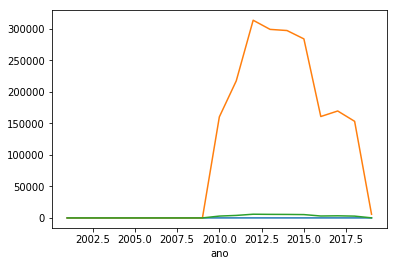

In [57]:
# Plotando um gráfico comparativo do ganhadores por tipo de prêmio
sena1_ganhadores.plot()
quadra1_ganhadores.plot()
quina1_ganhadores.plot()

O gráfico não ficou muito informativo devido a diferença entre os valores de cada tipo de ganhadores.
Para plotar um gráfico melhor, iremos utilizar a proporção de cada tipo de ganhadores.

In [58]:
# Proporções
# Totais
total_sena1 = df['ganhadores_sena_sorteio1'].sum()
valor_sena1 = df['rateio_sena_sorteio1'].sum()
total_quina1 = df['ganhadores_quina_sorteio1'].sum()
valor_quina1 = df['rateio_quina_sorteio1'].sum()
total_quadra1 = df['ganhadores_quadra_sorteio1'].sum()
valor_quadra1 = df['rateio_quadra_sorteio1'].sum()

# Proporção
sena1_ganhadores = sena1_ganhadores / total_sena1
sena1_valores = sena1_valores / valor_sena1
quina1_ganhadores = quina1_ganhadores / total_quina1
quina1_valores = quina1_valores / valor_quina1
quadra1_ganhadores = quadra1_ganhadores / total_quadra1
quadra1_valores = quadra1_valores / valor_quadra1

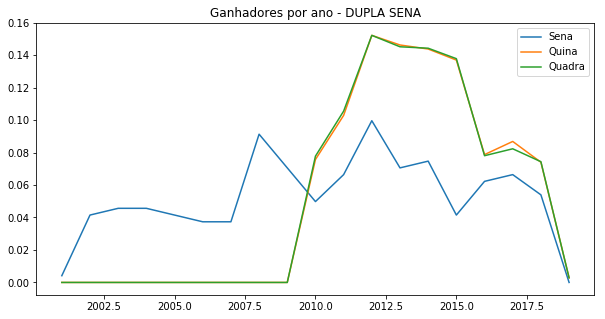

In [59]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

sena1_ganhadores.plot(label='Sena', figsize=(10,5))
quina1_ganhadores.plot(label='Quina')
quadra1_ganhadores.plot(label='Quadra')
plt.title('Ganhadores por ano - DUPLA SENA')
plt.xlabel('')
plt.legend();

Cursiosamente podemos observar a inexistencia de ganhadores de __Quadra__ e __Quina__ até o ano de 2009, e que os números neles possuem linha igual, já __SENA__ possui uma linha bem variável no decorrer dos anos.

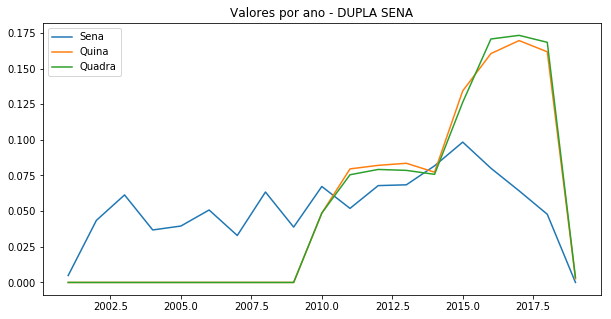

In [60]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

sena1_valores.plot(label='Sena', figsize=(10,5))
quina1_valores.plot(label='Quina')
quadra1_valores.plot(label='Quadra')
plt.title('Valores por ano - DUPLA SENA')
plt.xlabel('')
plt.legend();

No gráfico de valores _anuais_ observamos comportamente igual ao do _gráfico de ganhadores_

### Sorteio 2

In [61]:
# Agrupando por ano o total de ganhadores e valores pagos na SENA

sena2_ganhadores = df.groupby('ano')['ganhadores_sena_sorteio2'].sum()
sena2_valores = df.groupby('ano')['rateio_sena_sorteio2'].sum()

In [62]:
# Agrupando por ano o total de ganhadores e valores pagos na QUINA

quina2_ganhadores = df.groupby('ano')['ganhadores_quina_sorteio2'].sum()
quina2_valores = df.groupby('ano')['rateio_quina_sorteio2'].sum()

In [63]:
# Agrupando por ano o total de ganhadores e valores pagos na QUADRA

quadra2_ganhadores = df.groupby('ano')['ganhadores_quadra_sorteio2'].sum()
quadra2_valores = df.groupby('ano')['rateio_quadra_sorteio2'].sum()

In [64]:
# Proporções
# Totais
total_sena2 = df['ganhadores_sena_sorteio2'].sum()
valor_sena2 = df['rateio_sena_sorteio2'].sum()
total_quina2 = df['ganhadores_quina_sorteio2'].sum()
valor_quina2 = df['rateio_quina_sorteio2'].sum()
total_quadra2 = df['ganhadores_quadra_sorteio2'].sum()
valor_quadra2 = df['rateio_quadra_sorteio2'].sum()

# Proporção
sena2_ganhadores = sena2_ganhadores / total_sena2
sena2_valores = sena2_valores / valor_sena2
quina2_ganhadores = quina2_ganhadores / total_quina2
quina2_valores = quina2_valores / valor_quina2
quadra2_ganhadores = quadra2_ganhadores / total_quadra2
quadra2_valores = quadra2_valores / valor_quadra2

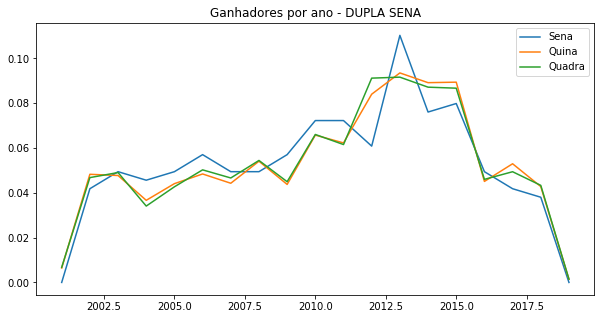

In [65]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

sena2_ganhadores.plot(label='Sena', figsize=(10,5))
quina2_ganhadores.plot(label='Quina')
quadra2_ganhadores.plot(label='Quadra')
plt.title('Ganhadores por ano - DUPLA SENA')
plt.xlabel('')
plt.legend();

Nos registros do __Sorteio 2__ observamos que todas as categorias de premiações seguem uma linha parecida desde o inicio dos registros.

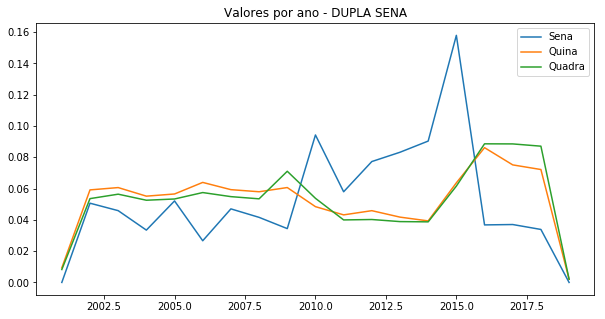

In [66]:
# Plotando um gráfico com os valores proporcionais - GANHADORES

sena2_valores.plot(label='Sena', figsize=(10,5))
quina2_valores.plot(label='Quina')
quadra2_valores.plot(label='Quadra')
plt.title('Valores por ano - DUPLA SENA')
plt.xlabel('')
plt.legend();

Em relação aos valores __Quadra__ e __Quina__ possuem uma linha semelhantes e __Sena__ segue uma variação diferenciada, apresentando valores maiores entre os anos de 2010 e 2015, grande queda de 2015 para 2016.

### Sorteio 1 e 2

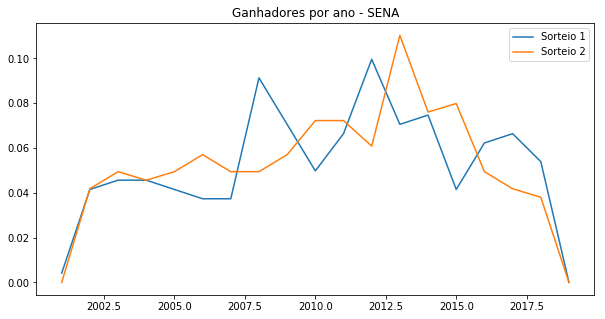

In [67]:
# Plotando um gráfico com os valores proporcionais - GANHADORES - SENA

sena1_ganhadores.plot(label='Sorteio 1', figsize=(10,5))
sena2_ganhadores.plot(label='Sorteio 2')
plt.title('Ganhadores por ano - SENA')
plt.xlabel('')
plt.legend();

As linhas possuem frequencias distintas, apresentando semelhança somente no periodo inicial até 2004.

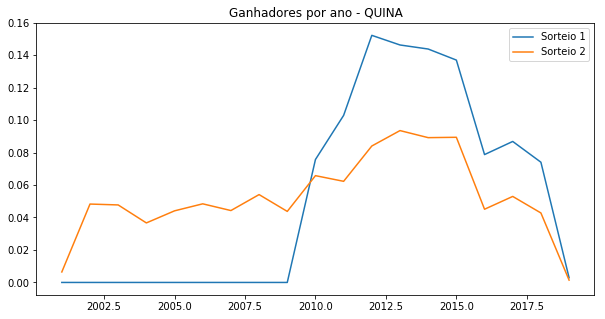

In [68]:
# Plotando um gráfico com os valores proporcionais - GANHADORES - QUINA

quina1_ganhadores.plot(label='Sorteio 1', figsize=(10,5))
quina2_ganhadores.plot(label='Sorteio 2')
plt.title('Ganhadores por ano - QUINA')
plt.xlabel('')
plt.legend();

Nos resultados da Quina podemos observar grande diferença entre as duas linhas, tendo a partir de 2010 maiores registros de ganhadores no __primeiro sorteio__

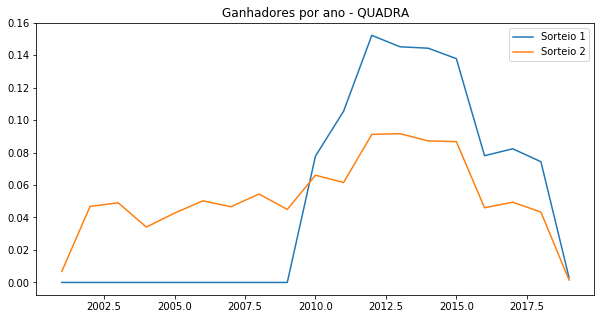

In [69]:
# Plotando um gráfico com os valores proporcionais - GANHADORES - QUADRA

quadra1_ganhadores.plot(label='Sorteio 1', figsize=(10,5))
quadra2_ganhadores.plot(label='Sorteio 2')
plt.title('Ganhadores por ano - QUADRA')
plt.xlabel('')
plt.legend();

__Quadra__ segue o mesmo resultado da analise da _Quina_ tendo a partir de 2010 maiores registros de ganhadores no __primeiro sorteio__

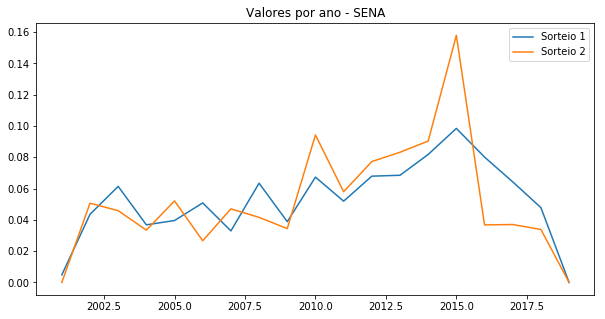

In [70]:
# Plotando um gráfico com os valores proporcionais - SENA

sena1_valores.plot(label='Sorteio 1', figsize=(10,5))
sena2_valores.plot(label='Sorteio 2')
plt.title('Valores por ano - SENA')
plt.xlabel('')
plt.legend();

Os valores seguem linhas bem variadas, tendo uma maior diferença no ano de 2015 onde os valores distribuidos no __Sorteio 2__ são bem superiores ao do __Sorteio 1__

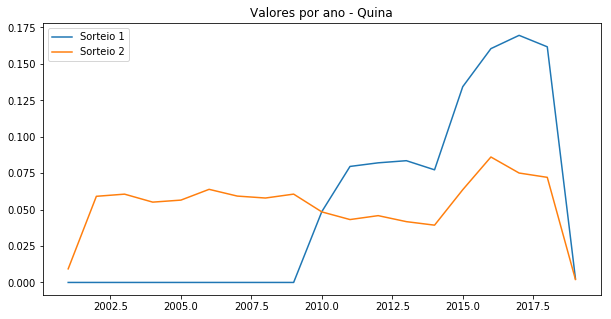

In [71]:
# Plotando um gráfico com os valores proporcionais - QUINA

quina1_valores.plot(label='Sorteio 1', figsize=(10,5))
quina2_valores.plot(label='Sorteio 2')
plt.title('Valores por ano - Quina')
plt.xlabel('')
plt.legend();

Na __Quina__ o valor total no __Sorteio 1__ a partir de _2010_ segue uma linha superior aos valores do __Sorteio 2__

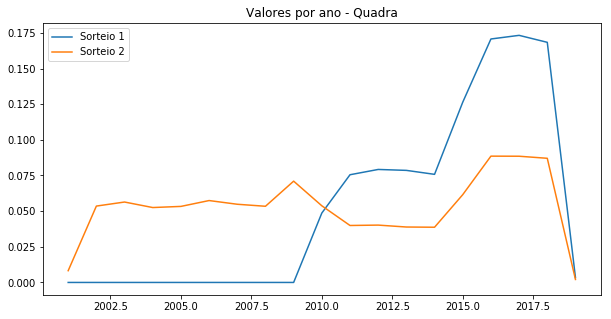

In [72]:
# Plotando um gráfico com os valores proporcionais - Quadra

quadra1_valores.plot(label='Sorteio 1', figsize=(10,5))
quadra2_valores.plot(label='Sorteio 2')
plt.title('Valores por ano - Quadra')
plt.xlabel('')
plt.legend();

Assim como na _Quina_ os valores da __Quadra__ também são superiores no __Sorteio 1__ em relação ao __Sorteio 2__ a partir de 2010.

## Conclusão

Como podemos observar os valores/ganhadores distribuidos na __SENA__ no SORTEIO 1 e SORTEIO 2 possuem variação no decorrer dos anos e não possuem semelhança.

Já os resultados da analise da __Quina__ e __Quadra__ apresentam _a partir de 2010_ maiores registros de prêmios e ganhadores no Sorteio 1 em relação ao Sorteio 2, _no periodo que antecede 2010 não possuimos registros de ganhadores no Sorteio 1 e tão pouco informações se os registros estão corretos antes desse periodo_

### Limitações

Nosso dataframe foi importado a partir de um arquivo _.htm_ e apresentou algumas inconsistencias durante a analise devido a algumas quebras de valores que foram interpretadas como quebra de linha.

- Para contornar o problema removemos as linhas criadas de forma a não afetar nossas analises

As colunas foram importadas como _string_ o que nos levou a realizar as devidas conversões:
- data_sorteio - convertida para datetime
- demais colunas - convertidas para int, mesmo as colunas que tratam de valores foram convertidas para int para facilitar a manipulação de valores altos, e por trabalharmos com valores na casa dos milhões e bilhões, o descarte dos centavos não afetam os resultados finais.

## Sorteando alguns PALPITES com base no df

Iremos ver as desenas mais sorteadas em cada posição e então elaborar palpites com estes números, para isso iremos utilizar a biblioteca __random__

Como temos 2 sorteios na __Dupla Sena__ iremos criar um novo df para inserir todos os numeros do primeiro e segundo sorteio para então elaborar os palpites.

In [73]:
df_bolas = pd.DataFrame()
df_temp = pd.DataFrame()

sorteios = [1,2] #temos dois sorteios
for sort in sorteios: 
    pos = '_' + str(sort) #montando o nome da dezena
    for posicao in range(6): #cada sorteio possui 6 numeros
        coluna = str(posicao+1) + pos #montando o nome da coluna que vai de 1 a 6
        df_temp[str(posicao+1)] = df[coluna] #adicionando a coluna ao df temporario e pegando as informações do df principal
    df_bolas = df_bolas.append(df_temp, ignore_index=True) #apendando os dados no df de bolas sorteadas

if df_bolas.shape[0] == df.shape[0]*2:
    print('Dataframe gerado com sucesso')

Dataframe gerado com sucesso


### Aqui iremos chamar a função PALPITE para elaborar palpites baseados no df

In [74]:
# Dados para elaboração do palpite
# Alterar apenas estas duas variaveis

palpitar = 2
bolas = 0

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [75]:
# Rodando a função com 
palpite(palpitar,bolas,6,df_bolas)

Palpite 1
9 - 32 - 7 - 40 - 49 - 30 - 

Palpite 2
14 - 35 - 9 - 18 - 49 - 32 - 



### Ultimo resultado da Mega

In [76]:
df.tail(1)

,concurso,data_sorteio,1_1,2_1,3_1,4_1,5_1,6_1,arrecadação_total,ganhadores_sena_sorteio1,...,4_2,5_2,6_2,ganhadores_sena_sorteio2,rateio_sena_sorteio2,ganhadores_quina_sorteio2,rateio_quina_sorteio2,ganhadores_quadra_sorteio2,rateio_quadra_sorteio2,ano
1885,1886,2019-08-01,42,8,35,25,47,26,4641106,0,...,38,13,23,0,0,32,3960,1868,86,2019


__Fabiano__ _Lima_ - 14/12/2018